In [1]:
import os
import numpy as np
import Cell_BLAST as cb
import utils
cb.config.RANDOM_SEED = 0
cb.config.N_JOBS = 4
fixed_model_kwargs = dict(
    latent_dim=10, cat_dim=20,
    epoch=500, patience=20
)

# ---
# Mouse
### Quake_10x_Bladder

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,cell_ontology_class,cell_ontology_id,cell_type1,cluster,dataset_name,donor,free_annotation,gender,organ,organism,plate,platform,region
10X_P4_3_AAAGTAGAGATGCCAG,bladder cell,CL:1001319,bladder cell,0.0,Quake_10x_Bladder,3-M-8,Bladder mesenchymal cell,M,Bladder,Mus musculus,10X_P4_3,10x,
10X_P4_3_AACCGCGTCCAACCAA,bladder cell,CL:1001319,bladder cell,2.0,Quake_10x_Bladder,3-M-8,Bladder mesenchymal cell,M,Bladder,Mus musculus,10X_P4_3,10x,
10X_P4_3_AACTCCCGTCGGGTCT,bladder cell,CL:1001319,bladder cell,5.0,Quake_10x_Bladder,3-M-8,Bladder mesenchymal cell,M,Bladder,Mus musculus,10X_P4_3,10x,
10X_P4_3_AACTCTTAGTTGCAGG,bladder urothelial cell,CL:1001428,bladder urothelial cell,3.0,Quake_10x_Bladder,3-M-8,Luminal bladder epithelial cell,M,Bladder,Mus musculus,10X_P4_3,10x,
10X_P4_3_AACTCTTTCATAACCG,bladder cell,CL:1001319,bladder cell,2.0,Quake_10x_Bladder,3-M-8,Bladder mesenchymal cell,M,Bladder,Mus musculus,10X_P4_3,10x,


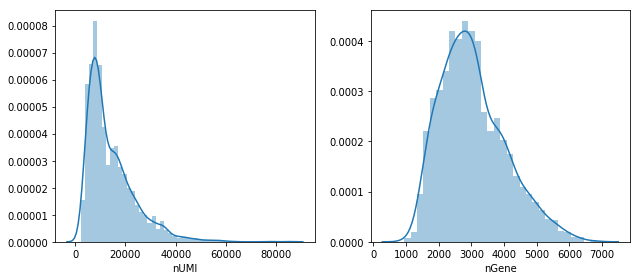

In [2]:
quake_10x_bladder = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Quake_10x_Bladder/data.h5")
utils.peek(quake_10x_bladder, "Quake_10x_Bladder")
quake_10x_bladder = quake_10x_bladder.normalize()
quake_10x_bladder.obs.head()

In [3]:
opt_model_kwargs = dict(batch_effect="donor")
quake_10x_bladder_model = cb.directi.fit_DIRECTi(
    quake_10x_bladder, quake_10x_bladder.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Quake_10x_Bladder/model_0"
)
quake_10x_bladder.latent = quake_10x_bladder_model.inference(quake_10x_bladder)

[DIRECTi epoch 0] train=2.536, val=2.609, time elapsed=2.1s Regular save...
[DIRECTi epoch 1] train=2.536, val=2.607, time elapsed=0.3s
[DIRECTi epoch 2] train=2.534, val=2.604, time elapsed=0.3s
[DIRECTi epoch 3] train=2.529, val=2.597, time elapsed=0.3s
[DIRECTi epoch 4] train=2.520, val=2.586, time elapsed=0.3s
[DIRECTi epoch 5] train=2.508, val=2.568, time elapsed=0.3s
[DIRECTi epoch 6] train=2.487, val=2.541, time elapsed=0.3s
[DIRECTi epoch 7] train=2.446, val=2.464, time elapsed=0.3s
[DIRECTi epoch 8] train=2.065, val=1.510, time elapsed=0.3s
[DIRECTi epoch 9] train=1.296, val=2.687, time elapsed=0.3s
[DIRECTi epoch 10] train=1.165, val=2.054, time elapsed=0.3s Regular save...
[DIRECTi epoch 11] train=1.156, val=1.918, time elapsed=0.3s
[DIRECTi epoch 12] train=1.151, val=2.209, time elapsed=0.3s
[DIRECTi epoch 13] train=1.150, val=1.667, time elapsed=0.3s
[DIRECTi epoch 14] train=1.144, val=1.608, time elapsed=0.3s
[DIRECTi epoch 15] train=1.112, val=1.461, time elapsed=0.3s
[D

[  Info   ] Computing tSNE...


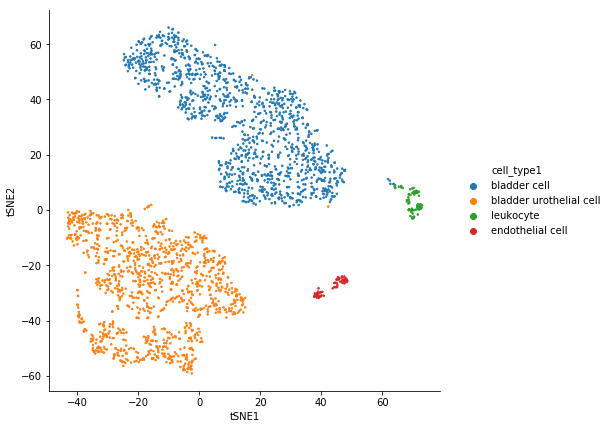

In [4]:
plot = quake_10x_bladder.visualize_latent("cell_type1")
plot.get_figure().savefig("Quake_10x_Bladder/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


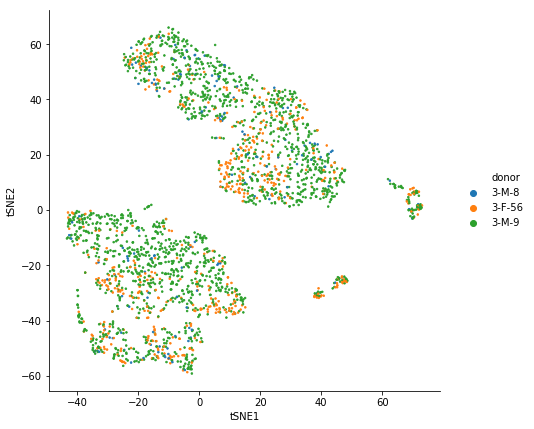

In [5]:
plot = quake_10x_bladder.visualize_latent("donor")
plot.get_figure().savefig("Quake_10x_Bladder/donor.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


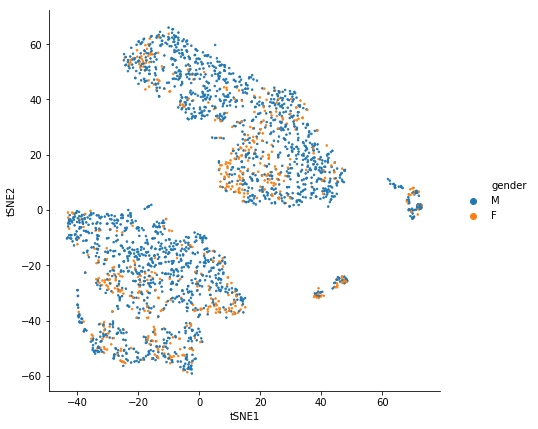

In [6]:
plot = quake_10x_bladder.visualize_latent("gender")
plot.get_figure().savefig("Quake_10x_Bladder/gender.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


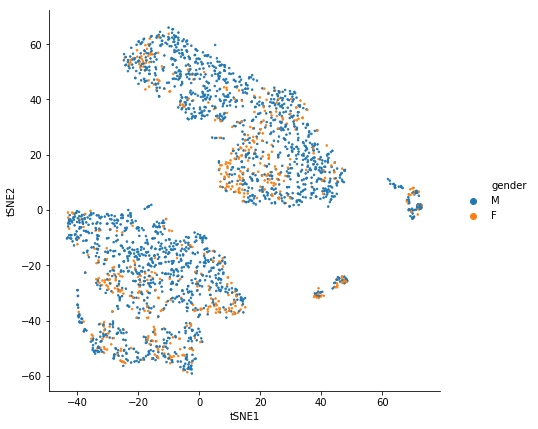

In [7]:
plot = quake_10x_bladder.visualize_latent("gender")
plot.get_figure().savefig("Quake_10x_Bladder/gender.pdf", bbox_inches="tight")

In [8]:
%%capture capio
quake_10x_bladder_models = [quake_10x_bladder_model]
opt_model_kwargs = dict(batch_effect="donor")
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    quake_10x_bladder_models.append(cb.directi.fit_DIRECTi(
        quake_10x_bladder, quake_10x_bladder.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Quake_10x_Bladder/model_%d" % i
    ))
quake_10x_bladder_blast = cb.blast.BLAST(quake_10x_bladder_models, quake_10x_bladder, 
                                               keep_exprs=True).build_empirical()
quake_10x_bladder_blast.save("Quake_10x_Bladder")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_10x_Bladder/model_1/checkpoint-208
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_10x_Bladder/model_2/checkpoint-272
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_10x_Bladder/model_3/checkpoint-221


In [9]:
with open("Quake_10x_Bladder/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Quake_10x_Bladder/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [10]:
utils.self_projection(quake_10x_bladder_blast, "Quake_10x_Bladder")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...


/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:313: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


Coverage = 0.9296
Accuracy = 0.9996


### Quake_Smart-seq2_Bladder

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,cell_ontology_class,cell_ontology_id,cell_type1,channel,cluster,dataset_name,donor,free_annotation,gender,organ,organism,platform,region
A12.D041914.3_8_M.1.1,bladder cell,CL:1001319,bladder cell,D041914,2.0,Quake_Smart-seq2_Bladder,3_8_M,Bladder mesenchymal cell,M,Bladder,Mus musculus,Smart-seq2,
B16.D041914.3_8_M.1.1,bladder urothelial cell,CL:1001428,bladder urothelial cell,D041914,3.0,Quake_Smart-seq2_Bladder,3_8_M,Luminal bladder epithelial cell,M,Bladder,Mus musculus,Smart-seq2,
C18.D041914.3_8_M.1.1,bladder urothelial cell,CL:1001428,bladder urothelial cell,D041914,4.0,Quake_Smart-seq2_Bladder,3_8_M,Luminal bladder epithelial cell,M,Bladder,Mus musculus,Smart-seq2,
D22.D041914.3_8_M.1.1,bladder urothelial cell,CL:1001428,bladder urothelial cell,D041914,1.0,Quake_Smart-seq2_Bladder,3_8_M,Luminal bladder epithelial cell,M,Bladder,Mus musculus,Smart-seq2,
F4.D041914.3_8_M.1.1,bladder cell,CL:1001319,bladder cell,D041914,5.0,Quake_Smart-seq2_Bladder,3_8_M,Bladder mesenchymal cell,M,Bladder,Mus musculus,Smart-seq2,


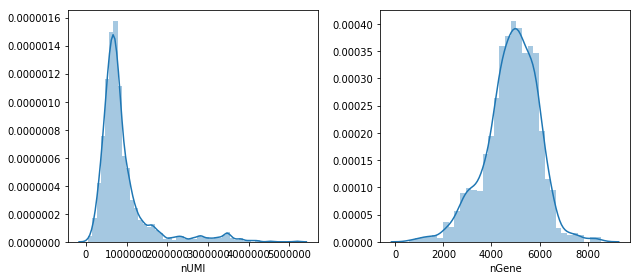

In [11]:
quake_smart_seq2_bladder = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Quake_Smart-seq2_Bladder/data.h5")
utils.peek(quake_smart_seq2_bladder, "Quake_Smart-seq2_Bladder")
quake_smart_seq2_bladder = quake_smart_seq2_bladder.normalize()
quake_smart_seq2_bladder.obs.head()

In [12]:
opt_model_kwargs = dict(batch_effect="donor")
quake_smart_seq2_bladder_model = cb.directi.fit_DIRECTi(
    quake_smart_seq2_bladder, quake_smart_seq2_bladder.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Quake_Smart-seq2_Bladder/model_0"
)
quake_smart_seq2_bladder.latent = quake_smart_seq2_bladder_model.inference(quake_smart_seq2_bladder)

[DIRECTi epoch 0] train=2.633, val=2.838, time elapsed=1.5s Regular save...
[DIRECTi epoch 1] train=2.628, val=2.835, time elapsed=0.2s
[DIRECTi epoch 2] train=2.625, val=2.830, time elapsed=0.2s
[DIRECTi epoch 3] train=2.621, val=2.824, time elapsed=0.2s
[DIRECTi epoch 4] train=2.614, val=2.818, time elapsed=0.2s
[DIRECTi epoch 5] train=2.608, val=2.811, time elapsed=0.2s
[DIRECTi epoch 6] train=2.602, val=2.804, time elapsed=0.2s
[DIRECTi epoch 7] train=2.595, val=2.796, time elapsed=0.2s
[DIRECTi epoch 8] train=2.587, val=2.787, time elapsed=0.2s
[DIRECTi epoch 9] train=2.578, val=2.775, time elapsed=0.2s
[DIRECTi epoch 10] train=2.565, val=2.759, time elapsed=0.2s Regular save...
[DIRECTi epoch 11] train=2.546, val=2.731, time elapsed=0.2s
[DIRECTi epoch 12] train=2.503, val=2.671, time elapsed=0.2s
[DIRECTi epoch 13] train=2.369, val=2.474, time elapsed=0.2s
[DIRECTi epoch 14] train=2.118, val=2.139, time elapsed=0.2s
[DIRECTi epoch 15] train=1.740, val=1.529, time elapsed=0.2s
[D

[  Info   ] Computing tSNE...


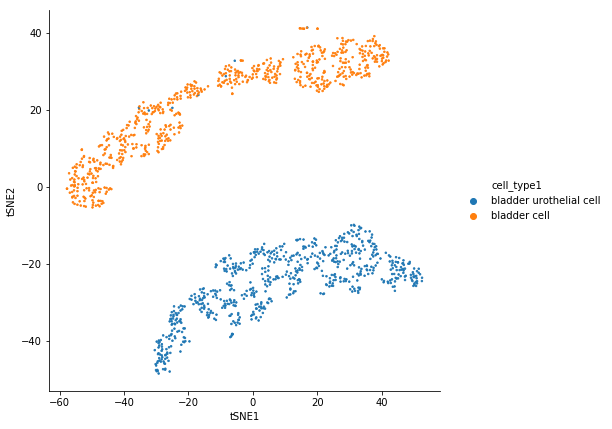

In [13]:
plot = quake_smart_seq2_bladder.visualize_latent("cell_type1")
plot.get_figure().savefig("Quake_Smart-seq2_Bladder/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


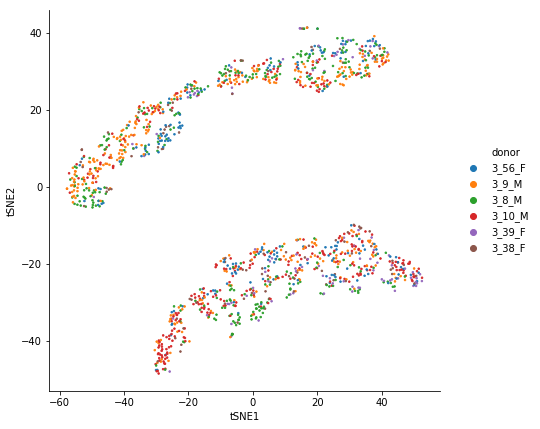

In [14]:
plot = quake_smart_seq2_bladder.visualize_latent("donor")
plot.get_figure().savefig("Quake_Smart-seq2_Bladder/donor.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


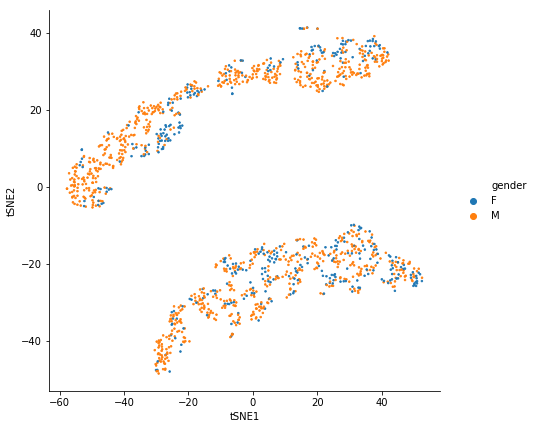

In [15]:
plot = quake_smart_seq2_bladder.visualize_latent("gender")
plot.get_figure().savefig("Quake_Smart-seq2_Bladder/gender.pdf", bbox_inches="tight")

In [16]:
%%capture capio
quake_smart_seq2_bladder_models = [quake_smart_seq2_bladder_model]
opt_model_kwargs = dict(batch_effect="donor")
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    quake_smart_seq2_bladder_models.append(cb.directi.fit_DIRECTi(
        quake_smart_seq2_bladder, quake_smart_seq2_bladder.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Quake_Smart-seq2_Bladder/model_%d" % i
    ))
quake_smart_seq2_bladder_blast = cb.blast.BLAST(quake_smart_seq2_bladder_models, quake_smart_seq2_bladder, 
                                               keep_exprs=True).build_empirical()
quake_smart_seq2_bladder_blast.save("Quake_Smart-seq2_Bladder")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Bladder/model_1/checkpoint-312
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Bladder/model_2/checkpoint-287
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Bladder/model_3/checkpoint-333


In [17]:
with open("Quake_Smart-seq2_Bladder/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Quake_Smart-seq2_Bladder/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [18]:
utils.self_projection(quake_smart_seq2_bladder_blast, "Quake_Smart-seq2_Bladder")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9543
Accuracy = 0.9962


## Mouse aligned

In [19]:
if not os.path.exists("ALIGNED_Mus_musculus_Bladder"):
    os.makedirs("ALIGNED_Mus_musculus_Bladder")
#quake_smart_seq2_bladder.obs["quake_smart_seq2_bladder_donor"] = \
#    quake_smart_seq2_bladder.obs["donor"]
#quake_10x_bladder.obs["quake_10x_bladder_donor"] = \
#    quake_10x_bladder.obs["donor"]
mouse = cb.data.ExprDataSet.merge_datasets(dict(
    quake_10x_bladder=quake_10x_bladder,
    quake_smart_seq2_bladder=quake_smart_seq2_bladder
), merge_uns_slots=["seurat_genes"])

[  Info   ] Merging uns slots...
[  Info   ] Merging var data frame...
[  Info   ] Merging obs data frame...
[  Info   ] Merging expression matrix...


/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/Cell_BLAST/data.py:579: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  merged_obs = pd.concat(merged_obs)


In [20]:
mouse.obs.head()

,cell_ontology_class,cell_ontology_id,cell_type1,channel,cluster,dataset_name,donor,free_annotation,gender,latent_1,...,latent_7,latent_8,latent_9,organ,organism,plate,platform,region,tSNE1,tSNE2
10X_P4_3_AAAGTAGAGATGCCAG,bladder cell,CL:1001319,bladder cell,NaN,0.0,Quake_10x_Bladder,3-M-8,Bladder mesenchymal cell,M,1.525296,...,0.178090,0.390989,-2.285188,Bladder,Mus musculus,10X_P4_3,10x,,-1.514958,56.035248
10X_P4_3_AACCGCGTCCAACCAA,bladder cell,CL:1001319,bladder cell,NaN,2.0,Quake_10x_Bladder,3-M-8,Bladder mesenchymal cell,M,0.511522,...,1.148306,0.846292,0.301871,Bladder,Mus musculus,10X_P4_3,10x,,16.658361,11.930847
10X_P4_3_AACTCCCGTCGGGTCT,bladder cell,CL:1001319,bladder cell,NaN,5.0,Quake_10x_Bladder,3-M-8,Bladder mesenchymal cell,M,0.760082,...,1.852314,0.100366,0.262669,Bladder,Mus musculus,10X_P4_3,10x,,22.161846,15.767212
10X_P4_3_AACTCTTAGTTGCAGG,bladder urothelial cell,CL:1001428,bladder urothelial cell,NaN,3.0,Quake_10x_Bladder,3-M-8,Luminal bladder epithelial cell,M,-1.163245,...,0.801019,-1.069032,-0.791412,Bladder,Mus musculus,10X_P4_3,10x,,-25.106697,-13.712059
10X_P4_3_AACTCTTTCATAACCG,bladder cell,CL:1001319,bladder cell,NaN,2.0,Quake_10x_Bladder,3-M-8,Bladder mesenchymal cell,M,0.014877,...,0.133164,0.660191,-0.084207,Bladder,Mus musculus,10X_P4_3,10x,,36.312031,24.298904


In [21]:
opt_model_kwargs = dict(
    batch_effect=["dataset_name", "donor"],
    #rmbatch_module=["MNNAdversarial", "Adversarial", "Adversarial", "Adversarial"],
    rmbatch_module_kwargs=dict(lambda_reg=0.01)
)  # Many batch effects are being aligned, decrease regularization strength accordingly
mouse_model = cb.directi.fit_DIRECTi(
    mouse, mouse.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/ALIGNED_Mus_musculus_Bladder/model_0"
)
mouse.latent = mouse_model.inference(mouse)

[DIRECTi epoch 0] train=2.380, val=2.403, time elapsed=2.2s Regular save...
[DIRECTi epoch 1] train=2.375, val=2.397, time elapsed=0.6s
[DIRECTi epoch 2] train=2.366, val=2.383, time elapsed=0.6s
[DIRECTi epoch 3] train=2.348, val=2.357, time elapsed=0.5s
[DIRECTi epoch 4] train=2.291, val=2.248, time elapsed=0.5s
[DIRECTi epoch 5] train=1.676, val=1.231, time elapsed=0.6s
[DIRECTi epoch 6] train=1.097, val=1.188, time elapsed=0.6s
[DIRECTi epoch 7] train=1.087, val=1.137, time elapsed=0.5s
[DIRECTi epoch 8] train=1.081, val=1.130, time elapsed=0.5s
[DIRECTi epoch 9] train=1.077, val=1.100, time elapsed=0.6s
[DIRECTi epoch 10] train=1.060, val=1.051, time elapsed=0.6s Regular save...
[DIRECTi epoch 11] train=0.978, val=0.970, time elapsed=0.5s
[DIRECTi epoch 12] train=0.945, val=0.942, time elapsed=0.5s
[DIRECTi epoch 13] train=0.933, val=0.956, time elapsed=0.5s
[DIRECTi epoch 14] train=0.928, val=0.935, time elapsed=0.5s
[DIRECTi epoch 15] train=0.931, val=0.932, time elapsed=0.5s
[D

[  Info   ] Computing tSNE...


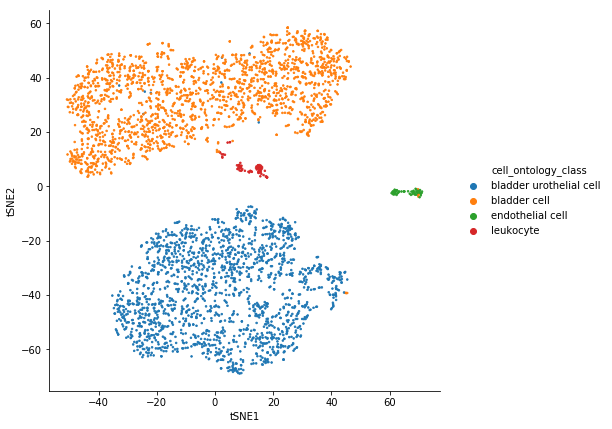

In [22]:
plot = mouse.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Bladder/cell_ontology_class.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


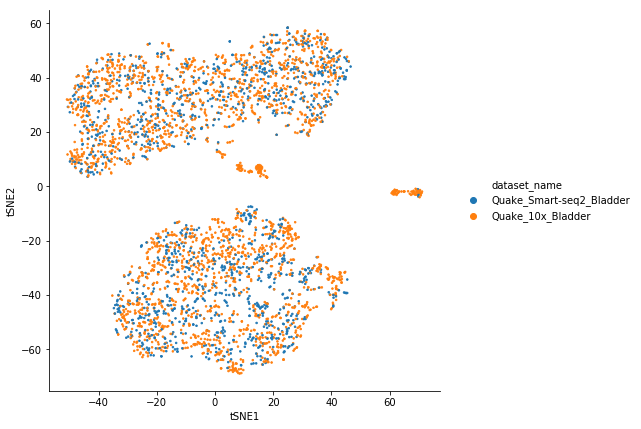

In [23]:
plot = mouse.visualize_latent("dataset_name")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Bladder/dataset_name.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


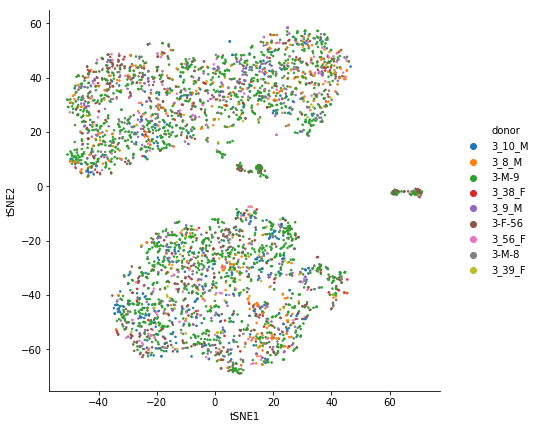

In [24]:
plot = mouse.visualize_latent("donor")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Bladder/donor.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


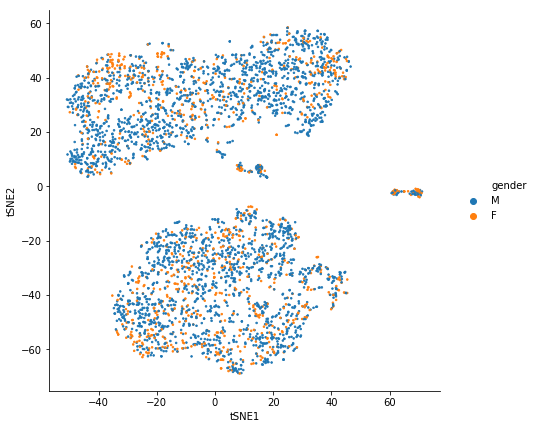

In [25]:
plot = mouse.visualize_latent("gender")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Bladder/gender.pdf", bbox_inches="tight")

In [26]:
%%capture capio
mouse_models = [mouse_model]
opt_model_kwargs = dict(
    batch_effect=["dataset_name", "donor"],
    #rmbatch_module=["MNNAdversarial", "Adversarial", "Adversarial", "Adversarial"],
    rmbatch_module_kwargs=dict(lambda_reg=0.01)
)  # Many batch effects are being aligned, decrease regularization strength accordingly
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    mouse_models.append(cb.directi.fit_DIRECTi(
        mouse, mouse.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/ALIGNED_Mus_musculus_Bladder/model_%d" % i
    ))
mouse_blast = cb.blast.BLAST(mouse_models, mouse, keep_exprs=True).build_empirical()
mouse_blast.save("ALIGNED_Mus_musculus_Bladder")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Bladder/model_1/checkpoint-179
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Bladder/model_2/checkpoint-144
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Bladder/model_3/checkpoint-156


In [27]:
with open("ALIGNED_Mus_musculus_Bladder/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("ALIGNED_Mus_musculus_Bladder/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [28]:
utils.self_projection(mouse_blast, "ALIGNED_Mus_musculus_Bladder")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...


/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:313: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


Coverage = 0.9600
Accuracy = 0.9981
